* analizar imagenes 

In [22]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve
espacioTrabajo = os.getcwd()
from collections import deque

In [23]:
class Imagen:
    nombre = None  # Nombre archivo de la imagen
    ubicacion = None  # Direccion en la que se halla la imagen
    matriz_bytes = None  # Matriz de numpy que contiene bytes de cada imagen

    def __init__(self, nombre, ubicacion):
        self.nombre = nombre
        self.ubicacion = ubicacion
        self.matriz_bytes = None

    def generar_ubicacion(self, nueva_ubicacion: str):
        self.ubicacion = nueva_ubicacion

    def calculo_energia(self):
        filtro_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        filtro_vertical = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        # Se aplica la convulución respecto a los filtros.
        convol_horizontal = convolve(self.matriz_bytes, filtro_horizontal)
        convol_vertical = convolve(self.matriz_bytes, filtro_vertical)
        # Esta operacion nos devuelve un mapa de energia para matrices con valores en escala de grises.
        return np.absolute(convol_horizontal) + np.absolute(convol_vertical)

    def cargarImagen(self):
        print("cargando... "+self.nombre+" como formato cvs")
        reader = open(self.ubicacion+self.nombre, 'r')
        self.matriz_bytes = np.loadtxt(reader, delimiter=",")

    def mostrarImagen(self):
        plt.figure(figsize=(10, 10))
        plt.grid("off")
        plt.axis("off")
        # Recibe la matriz de cada imagen en bytes con valores de 0 a 255.
        plt.imshow(self.matriz_bytes, cmap="gray", vmin=0, vmax=255)
        plt.show()

    def minimaCostura(self):
        r, c = self.matriz_bytes.shape
        mapaEnergia = self.calculo_energia()
        M = mapaEnergia.copy()
        retroceso = np.zeros_like(M, dtype=np.int)
        for i in range(1, r):
            for j in range(0, c):
                if j == 0:
                    idx = np.argmin(M[i - 1, j:j + 2])
                    retroceso[i, j] = idx + j
                    min_energy = M[i - 1, idx + j]
                else:
                    idx = np.argmin(M[i - 1, j - 1:j + 2])
                    retroceso[i, j] = idx + j - 1
                    min_energy = M[i - 1, idx + j - 1]
                M[i, j] += min_energy
        return M, retroceso

    def cortarColumna(self):
        r, c = self.matriz_bytes.shape
        M, retroceso = self.minimaCostura()
        filtro = np.ones((r, c), dtype=np.bool)
        j = np.argmin(M[-1])
        for i in reversed(range(r)):
            filtro[i, j] = False
            j = retroceso[i, j]
        self.matriz_bytes = self.matriz_bytes[filtro]
        self.matriz_bytes = self.matriz_bytes.reshape(r, c-1)

    def cortarFila(self, scale):
        self.matriz_bytes = np.rot90(self.matriz_bytes, 1)
        self.eliminandoColumnas(scale)
        self.matriz_bytes = np.rot90(self.matriz_bytes, 3)

    def eliminandoColumnas(self, scale_c):
        r, c = self.matriz_bytes.shape
        new_c = int(scale_c * c)
        for i in range(c - new_c):
            self.cortarColumna()

    def resumirImagen(self):
        r, c = self.matriz_bytes.shape
        for i in range(r):
            for j in range(c):
                self.matriz_bytes[i][j] = (self.matriz_bytes[i][j]//100)*100

    def recorridoLongitudCompresion(self):
        datos = deque()
        for i in range(len(self.matriz_bytes)):
            estamos = self.matriz_bytes[i]
            longitud = len(estamos)-1
            j = 0
            salida = deque()
            while j <= longitud:
                contador = 1
                while i < longitud and estamos[j] == estamos[j+1]:
                    contador += 1
                    j += 1

    def run_length_encoding(self):
        # List for storing run length encoding
        encoding = []

        # Counts the number of occurrences
        count = 0

        # Initialize previous element to first element in matrix
        previous_element = self.matriz_bytes[0][0]

        for row in self.matriz_bytes:
            for current_element in row:
                if current_element == previous_element:
                    count += 1
                else:
                    encoding.append(previous_element)
                    encoding.append(count)

                    # Reset counter and update previous element
                    count = 1
                    previous_element = current_element

        # Append last element since loop exited.
        encoding.append(previous_element)
        encoding.append(count)

        return encoding


def guardarImagenComprimida(matriz,carpeta):
    np.savetxt("codigo/datasets/csv/"+carpeta+"/ImagenComprimida" +
               str(matriz.nombre), matriz.matriz_bytes, delimiter=",")


cargando... 0.csv como formato cvs


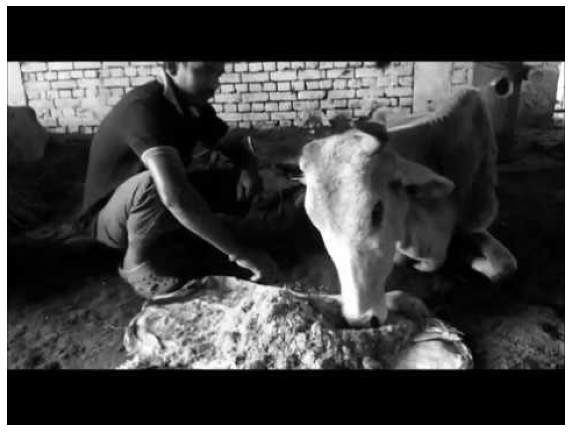

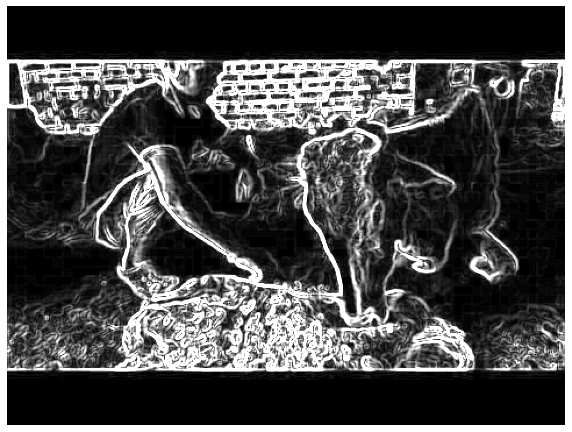

<ipython-input-23-7f939c1b85fa>:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  retroceso = np.zeros_like(M, dtype=np.int)
<ipython-input-23-7f939c1b85fa>:57: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filtro = np.ones((r,

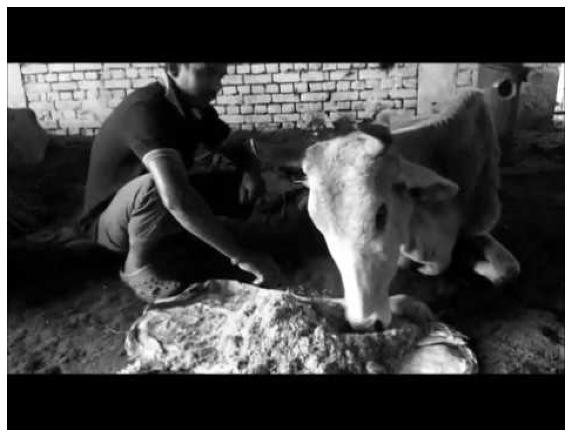

Con seam carving
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
resumiendo: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


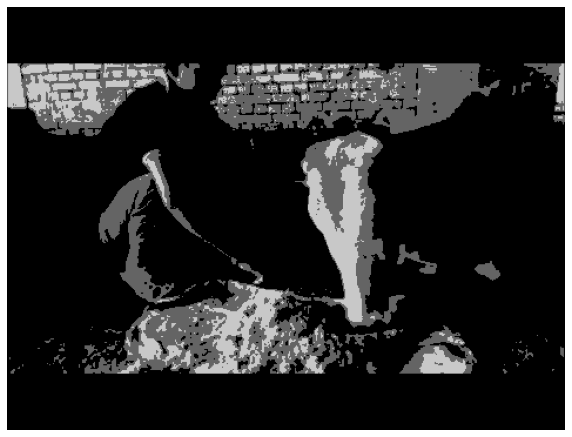

[0.0, 22800, 100.0, 1, 200.0, 8, 100.0, 3, 0.0, 2, 100.0, 19, 0.0, 1, 100.0, 6, 200.0, 13, 100.0, 5, 200.0, 16, 100.0, 7, 0.0, 1, 100.0, 1, 200.0, 2, 100.0, 1, 200.0, 1, 100.0, 1, 200.0, 2, 100.0, 9, 200.0, 1, 100.0, 8, 200.0, 1, 100.0, 6, 200.0, 4, 100.0, 2, 200.0, 1, 100.0, 10, 200.0, 1, 100.0, 2, 0.0, 13, 100.0, 3, 0.0, 4, 100.0, 8, 0.0, 37, 100.0, 6, 0.0, 3, 100.0, 10, 0.0, 1, 100.0, 11, 0.0, 1, 100.0, 13, 200.0, 2, 100.0, 1, 200.0, 3, 100.0, 5, 0.0, 1, 100.0, 1, 200.0, 1, 100.0, 9, 0.0, 1, 100.0, 13, 200.0, 1, 100.0, 4, 200.0, 1, 100.0, 10, 200.0, 1, 100.0, 6, 0.0, 2, 100.0, 1, 200.0, 3, 100.0, 6, 0.0, 13, 100.0, 7, 0.0, 1, 100.0, 64, 0.0, 38, 100.0, 19, 0.0, 1, 100.0, 12, 200.0, 2, 100.0, 2, 200.0, 8, 100.0, 2, 0.0, 2, 100.0, 6, 200.0, 14, 100.0, 2, 200.0, 21, 100.0, 2, 200.0, 22, 100.0, 3, 200.0, 14, 100.0, 2, 200.0, 1, 100.0, 2, 200.0, 2, 100.0, 4, 200.0, 15, 100.0, 1, 200.0, 4, 100.0, 7, 0.0, 12, 100.0, 4, 0.0, 4, 100.0, 9, 0.0, 24, 100.0, 6, 0.0, 2, 100.0, 11, 0.0, 1, 100.0, 

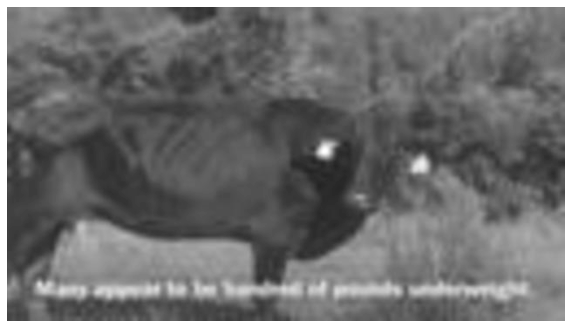

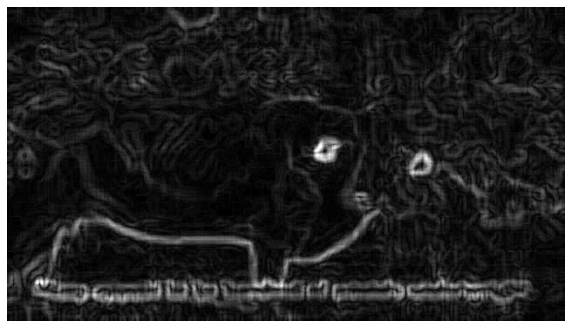

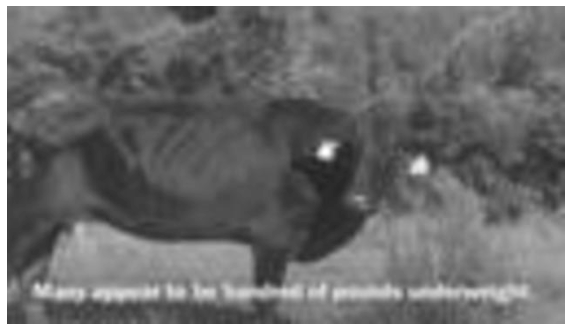

Con seam carving
[[128. 128. 128. ... 128. 127. 127.]
 [128. 128. 128. ... 128. 127. 127.]
 [127. 127. 127. ... 127. 126. 126.]
 ...
 [ 67.  68.  69. ... 147. 146. 146.]
 [ 67.  68.  69. ... 146. 145. 145.]
 [ 67.  68.  69. ... 145. 145. 145.]]
resumiendo: 
[[100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 ...
 [  0.   0.   0. ... 100. 100. 100.]
 [  0.   0.   0. ... 100. 100. 100.]
 [  0.   0.   0. ... 100. 100. 100.]]


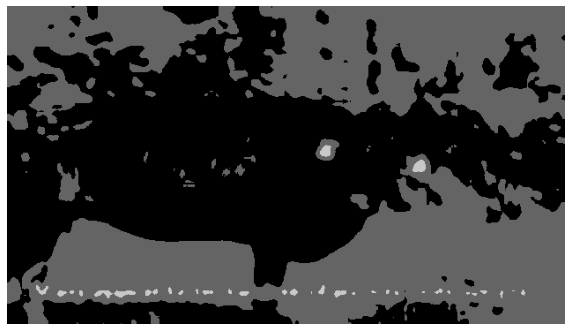

[100.0, 73, 0.0, 4, 100.0, 13, 0.0, 13, 100.0, 74, 0.0, 63, 100.0, 19, 0.0, 27, 100.0, 14, 0.0, 1, 100.0, 406, 0.0, 2, 100.0, 15, 0.0, 12, 100.0, 74, 0.0, 63, 100.0, 19, 0.0, 27, 100.0, 14, 0.0, 1, 100.0, 423, 0.0, 12, 100.0, 74, 0.0, 63, 100.0, 19, 0.0, 27, 100.0, 438, 0.0, 12, 100.0, 74, 0.0, 63, 100.0, 18, 0.0, 28, 100.0, 438, 0.0, 12, 100.0, 75, 0.0, 62, 100.0, 17, 0.0, 29, 100.0, 68, 0.0, 3, 100.0, 367, 0.0, 12, 100.0, 77, 0.0, 60, 100.0, 17, 0.0, 29, 100.0, 66, 0.0, 5, 100.0, 367, 0.0, 12, 100.0, 80, 0.0, 57, 100.0, 16, 0.0, 31, 100.0, 65, 0.0, 8, 100.0, 364, 0.0, 12, 100.0, 83, 0.0, 54, 100.0, 15, 0.0, 32, 100.0, 64, 0.0, 9, 100.0, 365, 0.0, 11, 100.0, 86, 0.0, 51, 100.0, 15, 0.0, 32, 100.0, 64, 0.0, 10, 100.0, 364, 0.0, 11, 100.0, 87, 0.0, 50, 100.0, 16, 0.0, 32, 100.0, 63, 0.0, 11, 100.0, 363, 0.0, 11, 100.0, 89, 0.0, 48, 100.0, 16, 0.0, 33, 100.0, 61, 0.0, 14, 100.0, 342, 0.0, 7, 100.0, 12, 0.0, 11, 100.0, 90, 0.0, 46, 100.0, 17, 0.0, 35, 100.0, 59, 0.0, 15, 100.0, 340, 0.0, 

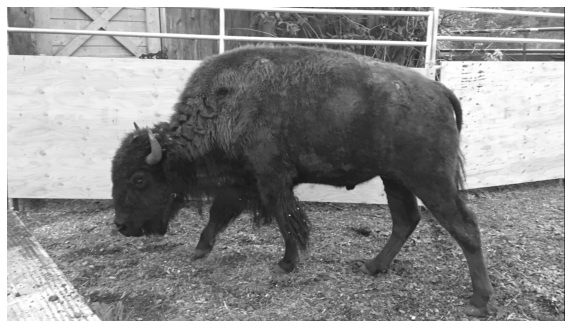

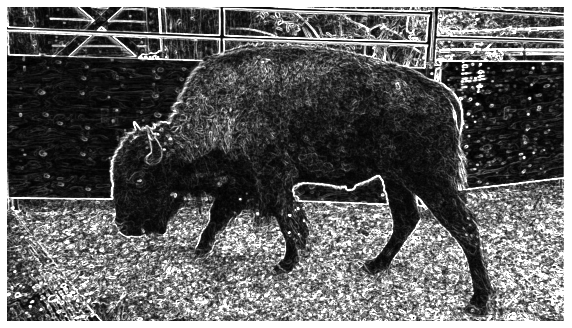

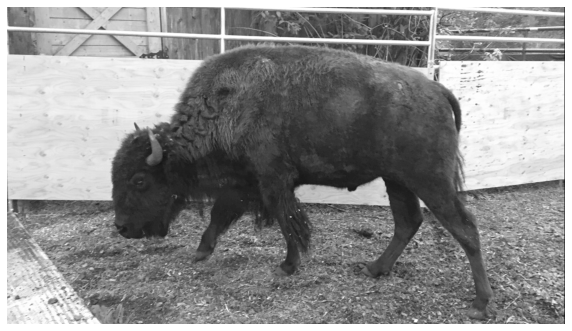

Con seam carving
[[143. 119.  95. ... 120. 122.   0.]
 [140. 121.  94. ... 119. 121.   0.]
 [136. 121.  93. ... 120. 122.   0.]
 ...
 [230. 226. 223. ... 107. 103.   0.]
 [230. 230. 230. ... 122.  91.   3.]
 [229. 231. 234. ... 122. 116.   1.]]
resumiendo: 
[[100. 100.   0. ... 100. 100.   0.]
 [100. 100.   0. ... 100. 100.   0.]
 [100. 100.   0. ... 100. 100.   0.]
 ...
 [200. 200. 200. ... 100. 100.   0.]
 [200. 200. 200. ... 100.   0.   0.]
 [200. 200. 200. ... 100. 100.   0.]]


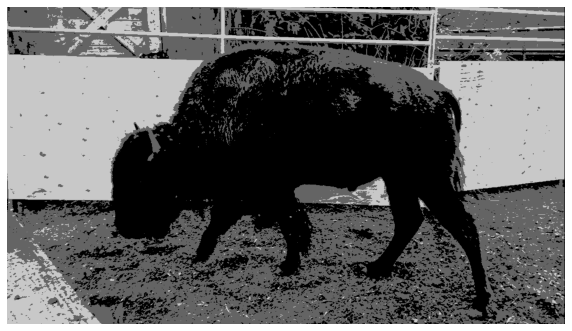

[100.0, 2, 0.0, 3, 100.0, 72, 200.0, 1, 100.0, 3, 200.0, 3, 100.0, 15, 200.0, 13, 100.0, 28, 0.0, 2, 100.0, 4, 200.0, 4, 100.0, 1, 200.0, 18, 100.0, 38, 200.0, 27, 100.0, 16, 200.0, 23, 100.0, 10, 200.0, 2, 100.0, 101, 200.0, 1, 100.0, 1, 200.0, 157, 100.0, 2, 200.0, 4, 100.0, 22, 0.0, 42, 100.0, 1, 0.0, 7, 100.0, 25, 0.0, 2, 100.0, 15, 0.0, 18, 100.0, 3, 0.0, 11, 100.0, 10, 0.0, 5, 100.0, 1, 0.0, 9, 100.0, 2, 0.0, 1, 100.0, 6, 0.0, 1, 100.0, 1, 0.0, 5, 100.0, 10, 0.0, 9, 100.0, 4, 0.0, 5, 100.0, 2, 0.0, 7, 100.0, 14, 0.0, 5, 100.0, 5, 0.0, 6, 100.0, 4, 0.0, 11, 100.0, 3, 0.0, 4, 100.0, 11, 200.0, 1, 100.0, 9, 0.0, 2, 100.0, 4, 0.0, 2, 100.0, 7, 200.0, 1, 100.0, 2, 200.0, 50, 100.0, 5, 200.0, 5, 100.0, 150, 200.0, 2, 100.0, 49, 0.0, 1, 100.0, 2, 0.0, 3, 100.0, 73, 200.0, 1, 100.0, 2, 200.0, 2, 100.0, 16, 200.0, 14, 100.0, 29, 0.0, 2, 100.0, 3, 200.0, 23, 100.0, 36, 200.0, 27, 100.0, 13, 200.0, 27, 100.0, 9, 200.0, 24, 100.0, 107, 200.0, 162, 100.0, 18, 0.0, 31, 100.0, 23, 0.0, 3, 100.0

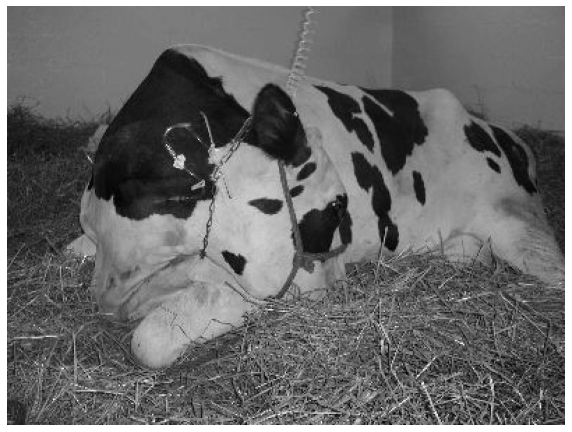

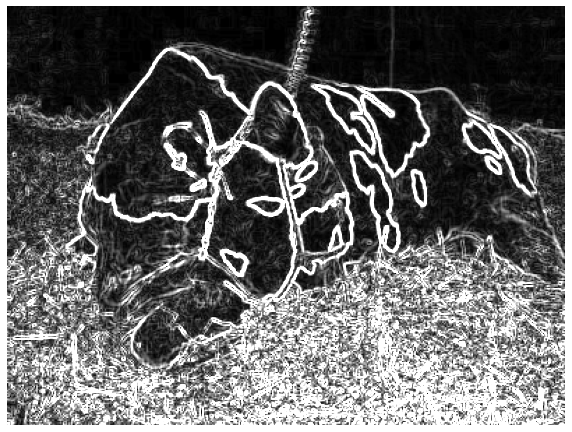

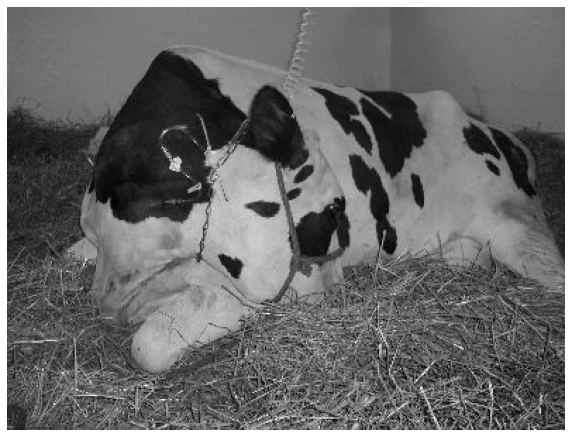

Con seam carving
[[101. 101.  99. ... 107. 105. 103.]
 [101. 101.  99. ... 108. 106. 104.]
 [101. 101. 100. ... 109. 107. 105.]
 ...
 [106. 109. 114. ...  62.  45.  60.]
 [ 75.  88. 106. ...  44.  20.  14.]
 [ 31.  47.  75. ... 103.  89.  55.]]
resumiendo: 
[[100. 100.   0. ... 100. 100. 100.]
 [100. 100.   0. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 ...
 [100. 100. 100. ...   0.   0.   0.]
 [  0.   0. 100. ...   0.   0.   0.]
 [  0.   0.   0. ... 100.   0.   0.]]


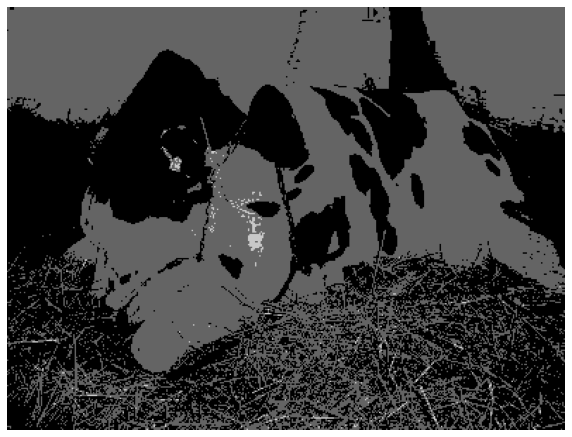

[100.0, 2, 0.0, 3, 100.0, 251, 0.0, 1, 100.0, 10, 0.0, 1, 100.0, 3, 0.0, 23, 100.0, 104, 0.0, 3, 100.0, 251, 0.0, 1, 100.0, 3, 0.0, 1, 100.0, 10, 0.0, 23, 100.0, 312, 0.0, 3, 100.0, 43, 0.0, 1, 100.0, 3, 0.0, 2, 100.0, 9, 0.0, 23, 100.0, 310, 0.0, 4, 100.0, 7, 0.0, 1, 100.0, 36, 0.0, 1, 100.0, 3, 0.0, 3, 100.0, 9, 0.0, 23, 100.0, 309, 0.0, 1, 100.0, 47, 0.0, 1, 100.0, 3, 0.0, 3, 100.0, 9, 0.0, 23, 100.0, 309, 0.0, 1, 100.0, 47, 0.0, 1, 100.0, 3, 0.0, 2, 100.0, 10, 0.0, 23, 100.0, 309, 0.0, 1, 100.0, 47, 0.0, 1, 100.0, 3, 0.0, 1, 100.0, 10, 0.0, 24, 100.0, 357, 0.0, 1, 100.0, 10, 0.0, 1, 100.0, 3, 0.0, 24, 100.0, 372, 0.0, 24, 100.0, 353, 0.0, 8, 100.0, 3, 0.0, 2, 100.0, 7, 0.0, 23, 100.0, 309, 0.0, 4, 100.0, 50, 0.0, 3, 100.0, 7, 0.0, 24, 100.0, 307, 0.0, 2, 100.0, 63, 0.0, 24, 100.0, 372, 0.0, 25, 100.0, 306, 0.0, 1, 100.0, 64, 0.0, 25, 100.0, 371, 0.0, 26, 100.0, 305, 0.0, 1, 100.0, 64, 0.0, 26, 100.0, 98, 0.0, 1, 100.0, 272, 0.0, 25, 100.0, 305, 0.0, 2, 100.0, 64, 0.0, 25, 100.0, 30

In [24]:
class Main:
    directorioActual =  espacioTrabajo.replace(string.punctuation[23], string.punctuation[14]) #Directorio actual reemplazando "\" por "/"
    lista_imagenes_Enfermos = os.listdir(directorioActual+'/codigo/datasets/csv/enfermo_csv/')
    lista_imagenes_Sanos= os.listdir(directorioActual+'/codigo/datasets/csv/sano_csv/')
    #Cargando imagenes de animales enfermos
    c=0
    for imagen in lista_imagenes_Enfermos:
        imagenEnfermo=Imagen(imagen,directorioActual+'/codigo/datasets/csv/enfermo_csv/')
        imagenEnfermo.cargarImagen()
        imagenEnfermo.mostrarImagen()
        imagenEnfermo.calculo_energia()
        plt.figure(figsize=(10, 10))
        plt.grid("off")
        plt.axis("off")
        # Recibe la matriz de cada imagen en bytes con valores de 0 a 255.
        plt.imshow(imagenEnfermo.calculo_energia(), cmap="gray", vmin=0, vmax=255)
        plt.show()
        
        imagenEnfermo.eliminandoColumnas(0.99)
        #imagenEnfermo.cortarFila(0.7)
        imagenEnfermo.mostrarImagen()
        print("Con seam carving")
        print(imagenEnfermo.matriz_bytes)
        imagenEnfermo.resumirImagen()
        print("resumiendo: ")
        print(imagenEnfermo.matriz_bytes)
        imagenEnfermo.mostrarImagen()
        print(imagenEnfermo.run_length_encoding())
        guardarImagenComprimida(imagenEnfermo,"enfermoComprimido")
        
        
        c+=1
        if c==4:
            break